### 이상치 
- 결측치, 범위에서 벗어나는 데이터, 값이 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우가 발생
- 이상치를 발견하면 확인 후 특정한 값을 대체, 삭제
- IQR 방식
    - matplotlib 에서 boxplot의 이상치 결정 방법
    - Q3(3사분위수)와 Q1(1사분위수)를 이용해서 범위 지정 
    - IQR = Q3 - Q1
    - 이상치의 경계 (Q3 + 1.5*IQR) (Q1 - 1.5 * IQR)
    - 많은 데이터를 이상치 판단할 수 있다. 
    - 1.5 값을 조절해서 이상치의 범위를 변경

In [45]:
# 사이킷런 설치 
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine


In [2]:
# 데이터셋 로드 
wine_load = load_wine()

In [3]:
wine_load

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
# wine_load에 data를 이용하여 데이터프레임을 생성 
wine = pd.DataFrame(wine_load['data'], columns=wine_load['feature_names'] )
wine.head() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
wine['class'] = wine_load['target']

In [6]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

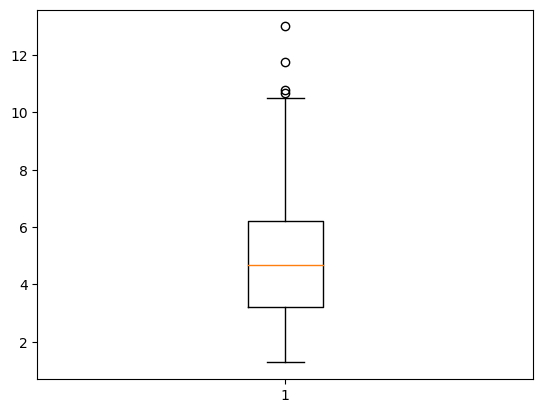

In [7]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [8]:
wine['color_intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

In [9]:
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])

In [10]:
print(q_1)
print(q_3)

3.2199999999999998
6.2


In [11]:
iqr = q_3 - q_1
upper_whis = q_3 + (1.5 * iqr)
lower_whis = q_1 - (1.5 * iqr)
print(upper_whis, lower_whis)

10.670000000000002 -1.2500000000000009


- iqr을 이용한 이상치 판단 함수 생성 
    - 매개변수 3개
        - DataFrame형태의 데이터 
        - 기준이되는 컬럼(갯수가 가변)
        - cnt (범위 기본값을 1.5)
    - 기준이 되는 컬럼의 개수만큼 반복 실행 
        - 컬럼의 데이터를 기준으로 1사분위수, 3사분위수를 변수에 저장 
        - iqr 변수를 생성 
        - 상단의 경계, 하단의 경계를 지정 
        - 데이터프레임에서 해당하는 경계를 이용하여 이상치를 출력
        - 딕셔너리에 대입 (key값은 컬럼의 이름, value는 데이터프레임)
    - 딕셔너리 데이터를 되돌려준다. 

In [12]:
def outliers_iqr(_df, *_cols, _cnt = 1.5):
    # 빈 딕셔너리 데이터를 생성 
    result = dict()
    # _cols은 데이터의 타입? -> tuple
    for col in _cols:
        # 1사분위, 3사분위 데이터를 생성 
        q_1, q_3 = np.percentile( _df[col], [25, 75] )
        # iqr 생성
        iqr = q_3 - q_1
        # 상단 경계 하단 경계 생성 
        upper_whis = q_3 + ( _cnt * iqr )
        lower_whis = q_1 - ( _cnt * iqr )
        print(f"""
            {col}컬럼의 데이터에 
            상단의 경계는{upper_whis}이고 
            하단의 경계는{lower_whis}이다
            """)
        # 상단 경계와 하단경계를 이용하여 이상치 데이터를 추출
        outlier = _df[ (_df[col] > upper_whis) | (_df[col] < lower_whis) ]
        # 빈 딕셔너리에 대입 
        result[col] = outlier
    return result

In [13]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [14]:
outliers = outliers_iqr(wine, 'color_intensity', 'proanthocyanins')


            color_intensity컬럼의 데이터에 
            상단의 경계는10.670000000000002이고 
            하단의 경계는-1.2500000000000009이다
            

            proanthocyanins컬럼의 데이터에 
            상단의 경계는3.0이고 
            하단의 경계는0.20000000000000018이다
            


In [15]:
outliers['color_intensity']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


In [16]:
outliers['proanthocyanins']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562.0,1


### 이상치 정제 
1. 이상치 제거 
    - 데이터의 개수가 매우 많고 이상치가 존재하는 데이터의 개수가 전체 데이터에 비해 많지 않은 경우에는 제거 
    - 이상치를 제거 -> 데이터의 개수가 줄어든다. 
2. 이상치를 특정 데이터로 대체
    - 이상치의 값을 다른 값을 대체하는경우는 데이터 분석가에 따라 값들의 차이

In [17]:
df = wine.copy()

In [18]:
# 이상치를 제거 
df.drop(outliers['color_intensity'].index, axis=0, inplace=True)

In [19]:
print(f"원본데이터의 길이 : {len(wine)}")
print(f"이상치가 제거된 데이터의 길이 : {len(df)}")

원본데이터의 길이 : 178
이상치가 제거된 데이터의 길이 : 174


In [20]:
df2 = wine.copy()

In [21]:
# 이상치 데이터를 특정 데이터로 변경 
df2.loc[outliers['color_intensity'].index, 'color_intensity'] = \
    df2['color_intensity'].mean()

In [22]:
df2.loc[outliers['color_intensity'].index, 'color_intensity']

151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64

In [23]:
upper_whis = 10.67
lower_whis = -1.25

In [24]:
wine.loc[outliers['color_intensity'].index, 'color_intensity']

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [25]:
for idx in outliers['color_intensity'].index:
    # print(idx)
    data = wine.loc[idx, 'color_intensity']
    # print(data)
    if data > upper_whis:
        # print(upper_whis)
        wine.loc[idx, 'color_intensity'] = upper_whis
    elif data < lower_whis:
        # print(lower_whis)
        wine.loc[idx, 'color_intensity'] = lower_whis

    # break

In [26]:
wine.loc[outliers['color_intensity'].index, 'color_intensity']

151    10.67
158    10.67
159    10.67
166    10.67
Name: color_intensity, dtype: float64

### 범주형 변수 처리
- 범주형 변수는 같이 수학적 연산으로 모델을 생성하는 대부분 분석 도구에서 직접적으로 사용하기 어렵기때문에 특별 가공 처리
- 더미변수 사용
- 더미변수는 범주형 변수에 있는 범주들을 각각 컬럼으로 변경 -> 0과 1로 데이터를 대입하여 포함 여부를 보여주는 변수

In [27]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
wine['class'] = wine['class'].map(
    {
        0 : 'Class_0', 
        1 : "Class_1", 
        2 : 'Class_2'
    }
)

In [29]:
wine['class'].value_counts()

class
Class_1    71
Class_0    59
Class_2    48
Name: count, dtype: int64

In [30]:
# 더미변수 생성 
# get_dummies() 함수 이용
wine_dummy = pd.get_dummies(wine, columns=['class'])

In [31]:
wine_dummy['class_Class_2'].sum()

48

### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위하여 데이터를 train과 test 세트로 나누고 독립변수와 종속변수로 분리하는 작업 
- 분석 방법에 따라 train, test로 나누거나 train, validation, test로 분리하기도 함
    - train : test = 7 : 3
    - train : validation : test = 6 : 2 : 2
- sklearn 라이브러리에서 train_test_split() 함수를 이용하여 분할
    - train_test_split(X, Y, test_size = None, random_state = None, shuffle = True, stratify = None)
        - X : 독립 변수 데이터프레임
        - Y : 종속 변수 데이터프레임
        - test_size : test 데이터의 비율 (0 ~ 1) 
        - random_state : 임의의 번호를 지정, 같은 숫자를 사용한다면 같은 출력이 생성
        - shuffle : True라면 데이터를 추출하기 전에 섞어준다. (순서를 변경)
        - straify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출 

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [33]:
iris_load = load_iris()

In [34]:
iris_load.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
iris = pd.DataFrame(iris_load['data'], columns=iris_load['feature_names'])
iris['class'] = iris_load['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
iris['class'] = iris['class'].map({
    0 : 'Setosa', 
    1 : 'Versicolor', 
    2 : 'Virginica'
})

In [37]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [38]:
iris['class'].value_counts()

class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1), 
    iris['class'], 
    test_size= 0.2, 
    random_state= 1000
)

In [40]:
print(f"학습데이터의 수 : {len(x_train)} 테스트데이터의 수 : {len(x_test)}")
print(f"종속변수 학습데이터의 수 : {len(y_train)}, 테스트 데이터의 수 : {len(y_test)}")

학습데이터의 수 : 120 테스트데이터의 수 : 30
종속변수 학습데이터의 수 : 120, 테스트 데이터의 수 : 30


In [41]:
y_train.value_counts()

class
Setosa        41
Virginica     41
Versicolor    38
Name: count, dtype: int64

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('class', axis=1), 
    iris['class'], 
    test_size= 0.2, 
    stratify=iris['class'], 
    shuffle= True
)

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [43]:
Y_train.value_counts()

class
Virginica     40
Versicolor    40
Setosa        40
Name: count, dtype: int64

In [44]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
58,6.6,2.9,4.6,1.3
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
129,7.2,3.0,5.8,1.6
127,6.1,3.0,4.9,1.8
70,5.9,3.2,4.8,1.8
141,6.9,3.1,5.1,2.3
24,4.8,3.4,1.9,0.2
77,6.7,3.0,5.0,1.7
8,4.4,2.9,1.4,0.2
